In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
# CSV File - Read
df = pd.read_csv('C:\\Users\\hp\\Downloads\LGD_DATA.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.shape)

(15290, 7)


In [3]:
df['Losses in Thousands'].median()

354.9378735

In [4]:
import numpy as np
# Categorise Rating to Binary
df['RatingScore'] = np.where(df['Losses in Thousands'] >= 350, 1, 0)
print(df.head())

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  RatingScore  
0           203.319595            0  
1           402.197302            1  
2           553.132096            1  
3           292.430579            0  
4           246.540576            0  


In [5]:
from sklearn.preprocessing import LabelEncoder


labelencoder = LabelEncoder()

df.iloc[:, 4] = labelencoder.fit_transform(df.iloc[:, 4])

df.iloc[:, 5] = labelencoder.fit_transform(df.iloc[:, 5])


In [6]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,RatingScore
0,150024,24,5,1,1,0,203.319595,0
1,144880,31,10,1,0,1,402.197302,1
2,133742,56,37,1,1,0,553.132096,1
3,151282,52,31,1,0,0,292.430579,0
4,174407,20,3,1,1,1,246.540576,0


In [7]:
dfInput = df.iloc[:,2:6] # 0  is not required  = X

dfoutput = df.iloc[:,-1]  # Y

In [8]:

split = int(0.8*len(df))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]


In [9]:
model = LogisticRegression()
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [10]:
from sklearn import preprocessing
from sklearn import utils

model = model.fit(X_train,Y_train )

ms = model.score(X_train,Y_train)
print("model score::",ms)

model score:: 0.6999672988881622


In [13]:
print("Confusion Matrix")
predicted_Y_test = model.predict(X_test)

print(metrics.confusion_matrix(Y_test , predicted_Y_test))

Confusion Matrix
[[1022  463]
 [ 452 1121]]


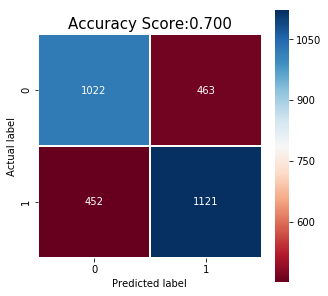

In [16]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test , predicted)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

In [17]:
print(metrics.classification_report(Y_test, predicted))

             precision    recall  f1-score   support

          0       0.69      0.69      0.69      1485
          1       0.71      0.71      0.71      1573

avg / total       0.70      0.70      0.70      3058



0.7761216744687819


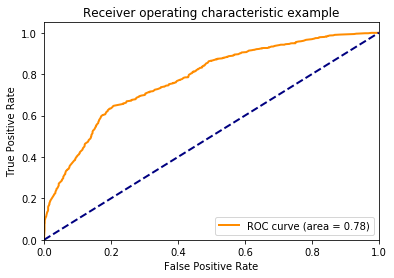

In [18]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()